In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, date
#from wordcloud import WordCloud
import plotly.express as px


In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_ed_visits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_ambulatory_visits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_re_admission_registry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_discharge = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_ed_unique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

In [5]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_patients.head(10)

PatientID  FirstName LastName             DateOfBirth Gender   Race  \
0          1      Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2        Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3    Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4    Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5      Tann      Bama 1962-05-01 19:12:58.950   Male  White   
5          6  Jerrilyn      Kane 1969-03-30 09:36:56.550   Male  White   
6          7    Skipton      Bar 1975-11-25 22:23:53.525   Male  White   
7          8  Alexandra    Green 1967-06-16 16:37:21.694   Male  White   
8          9    Devlin     Black 1974-09-24 23:43:46.185   Male  White   
9         10     Granny      Man 1969-09-15 11:20:42.218   Male  White   

  Language  
0  English  
1  English  
2  English  
3  English  
4  English  
5  English  
6  English  
7  English  
8  English  
9  English

# 1. Calculate the time spent in ED Department for each visit.


In [6]:
df_ed_visits["TimeSpent"] =(df_ed_visits["EDDischargeTime"]-df_ed_visits["VisitDate"]).dt.seconds/3600
df_ed_visits

EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0             1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2            13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4            15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
...         ...        ...                     ...                     ...   
1194       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
1195       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
1196       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
1197       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
1198       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

      Acuity ReasonForVisit EDDisposition  TimeSpent  
0          1   Stomach Ache      Admitted  11.339444  
1          2       Migraine      Admitted  23.238889  
2          3   Stomach Ache      Admitted   1.848889  
3          3       Migraine      Admitted   1.335833  
4          3     Chest Pain      Admitted   2.638889  
...      ...            ...           ...        ...  
1194       4     Chest Pain    Discharged  15.885833  
1195       1      Pneumonia    Discharged  22.451111  
1196       1      Pneumonia    Discharged   4.500833  
1197       1      Pneumonia    Discharged   6.176389  
1198       1      Pneumonia    Discharged  10.823889  

[1199 rows x 8 columns]

# 2.Get the  number of patients based on service and primary diagnosis.


In [7]:
by_diaganosis = df_re_admission_registry.groupby(["PrimaryDiagnosis","Service"]).count()
by_diaganosis["PatientID"]

PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

# 3. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

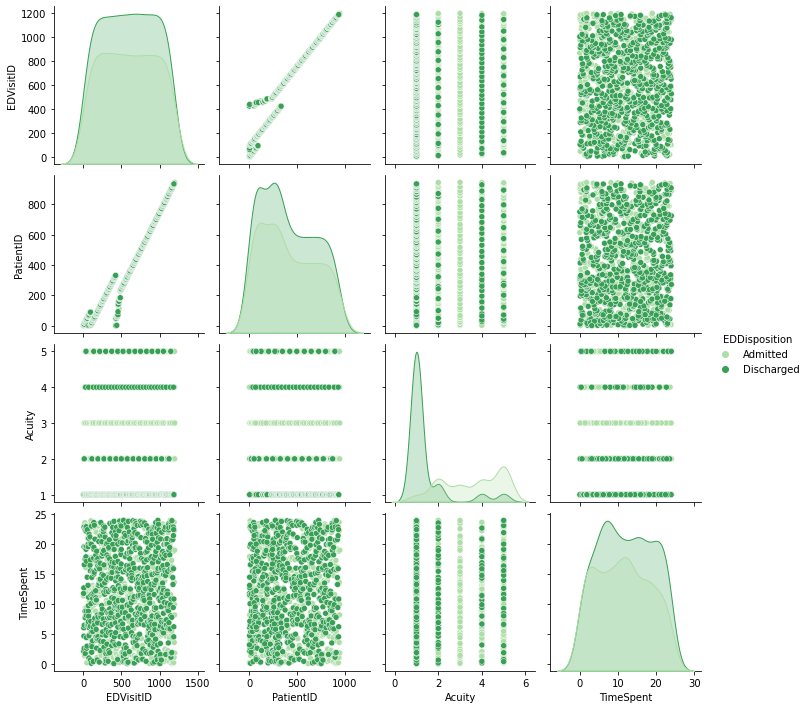

In [8]:
sns.pairplot(df_ed_visits,hue='EDDisposition',palette = 'Greens')
plt.show()

# 4. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)


In [9]:
#import pymysql


#conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Barkha*1984',db='pythonhackathon')

#df_query=pd.read_sql_query("SELECT ProviderName FROM Providers where ProviderName like 'T%' ",conn)

#print(df_query)

# 5. Create a bar chart between expectedLOS & Primary diagnosis.


<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

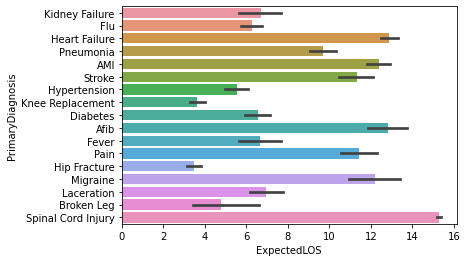

In [10]:
sns.barplot(data = df_re_admission_registry, x="ExpectedLOS", y = "PrimaryDiagnosis")


# 6. Find the last name of the patients, by getting the first name from the user.


In [11]:
name = input("Enter the first name to get the last name: ").title()
df_patients["LastName"].loc[df_patients['FirstName'] == name]


Enter the first name to get the last name: far


1        Myers
15      Pardon
95    Rudinger
Name: LastName, dtype: object

# 7. Find the list of patients whose ExpectedLOS is greater than the value given by the user.


In [12]:
LOS = float(input("Enter the ExpectedLOS: "))
df_re_admission_registry[["PatientID","ExpectedLOS"]][df_re_admission_registry["ExpectedLOS"]>LOS]

Enter the ExpectedLOS: 16.7


PatientID  ExpectedLOS
100         95    16.838918
217        215    16.998213
344        338    16.753521
357        351    16.784042
358        352    16.989907
421        438    16.974824
473        490    16.851937
542        560    16.785926
643        663    16.867883

# 8. Using Sunburst chart display the providers name by their provider speciality, considering their experience.


In [13]:
df_providers["Experience"] = (pd.to_datetime('today').year- df_providers["ProviderDateOnStaff"].dt.year)
df_providers
figure = px.sunburst(df_providers, path=['ProviderSpecialty','ProviderName'], values ="Experience" )
figure.show()


# 9.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.


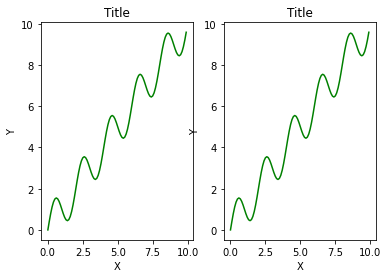

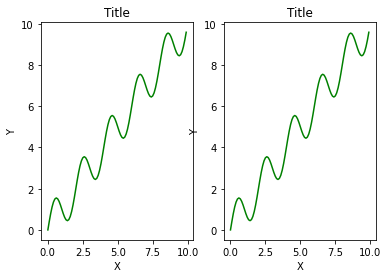

In [14]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
fig, axes = plt.subplots(nrows = 1, ncols = 2)
for ax in axes:
    ax.plot(x,y,"g")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Title')
fig



# 10.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).


In [15]:
grouped_count = df_ed_visits.groupby(["EDDisposition","ReasonForVisit"]).count()
stacked = grouped_count.stack()
unstack_level = grouped_count.stack(level=0).unstack()
print(unstack_level["PatientID"])


EDDisposition  ReasonForVisit     
Admitted       Accident                39
               Bleeding                16
               Car Accident            17
               Chest Pain              94
               Fever                   46
               Gun Shot                16
               Migraine                47
               Pneumonia              136
               Shortness of Breath     72
               Stomach Ache            32
Discharged     Bleeding                15
               Chest Pain              15
               Cough                    1
               Fever                  188
               Intoxication            30
               Laceration              30
               Migraine               109
               Pneumonia               65
               Shortness of Breath     77
               Stomach Ache           154
Name: PatientID, dtype: int64


# 11. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.


In [16]:
df_re_admission_registry["Date"] = pd.DatetimeIndex(df_re_admission_registry["DischargeDate"]).date
df_re_admission_registry["Time"] = pd.DatetimeIndex(df_re_admission_registry["DischargeDate"]).time
df_new = df_re_admission_registry[["DischargeDate","Date", "Time"]].copy()
df_new

DischargeDate        Date             Time
0   2018-01-04 19:59:31.391  2018-01-04  19:59:31.391000
1   2018-01-04 21:28:51.898  2018-01-04  21:28:51.898000
2   2018-01-04 22:28:23.672  2018-01-04  22:28:23.672000
3   2018-01-05 05:47:04.933  2018-01-05  05:47:04.933000
4   2018-01-05 14:18:30.029  2018-01-05  14:18:30.029000
..                      ...         ...              ...
715 2018-03-07 21:22:10.061  2018-03-07  21:22:10.061000
716 2018-03-08 02:43:18.749  2018-03-08  02:43:18.749000
717 2018-03-08 09:27:18.377  2018-03-08  09:27:18.377000
718 2018-03-10 06:06:12.068  2018-03-10  06:06:12.068000
719 2018-03-10 20:38:30.568  2018-03-10  20:38:30.568000

[720 rows x 3 columns]

# 12.Create a visualization on the count of patients based on primary diagnosis.


<AxesSubplot:xlabel='PatientID', ylabel='PrimaryDiagnosis'>

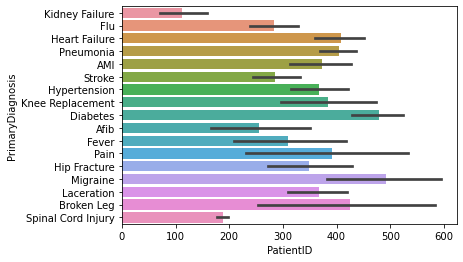

In [17]:
sns.barplot(data = df_re_admission_registry,x = "PatientID", y = "PrimaryDiagnosis")

# 13. Create a bar chart on service & expected length of stay.


<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

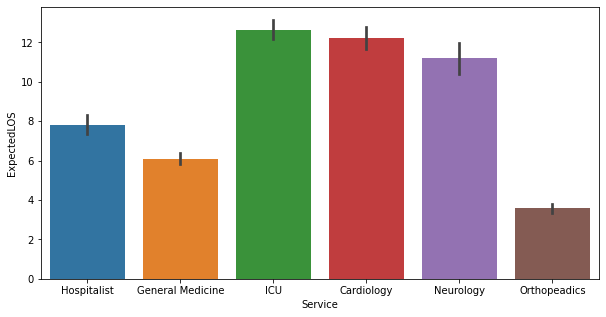

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = df_re_admission_registry, x = "Service",y = "ExpectedLOS")


# 14. Find the count of Spanish Speaking patients.


In [19]:
spanish_patients = df_patients["PatientID"][df_patients["Language"]=="Spanish"].count()
print("The count of Spanish speaking patients is: ",spanish_patients)

The count of Spanish speaking patients is:  110


# 15. Create a boxplot on ExpectedLOS by taking service into account.


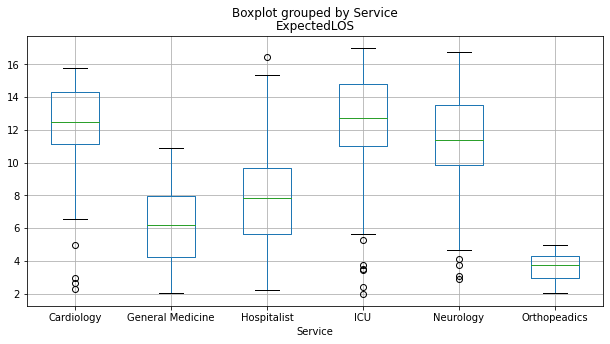

In [20]:
df = df_discharge.boxplot(column='ExpectedLOS',by='Service',figsize=(10,5))

# 16. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [21]:
specialtyGroups = df_providers.groupby('ProviderSpecialty').groups
print("The ProviderSpecialty groups are :",list((specialtyGroups).keys()))

The ProviderSpecialty groups are : ['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery']


# 17. Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)


In [22]:
#import pymysql

#import pandas as a

#conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Barkha*1984',db='pythonhackathon')

#df=a.read_sql_query("SELECT distinct(SUBSTRING_INDEX(DateofVisit,'/',-1)) as RecordYear from ambulatoryvisits",conn)

#print(df)

# 18. Display using a donut chart the patient count in the ReAdmissionRegistry.


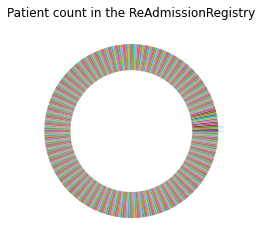

In [23]:
id = df_re_admission_registry['PatientID'].value_counts()
labels = df_re_admission_registry['PatientID'].value_counts().keys()

plt.pie(id )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Patient count in the ReAdmissionRegistry")
plt.show()

# 19. Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.

In [24]:
LOS_diff = df_discharge['ExpectedLOS'].max() - df_discharge['ExpectedLOS'].min() 
df_discharge[df_discharge['ExpectedLOS'] > LOS_diff]

AdmissionID  PatientID AdmissionDate           DischargeDate  \
12           398        134    2018-01-10 2018-01-15 16:43:47.026   
24           368        178    2018-01-14 2018-01-18 13:44:53.072   
31           369        198    2018-01-15 2018-01-31 14:28:07.437   
36           406        230    2018-01-18 2018-02-01 20:55:30.903   
47           174        352    2018-01-29 2018-02-02 21:21:45.388   
87           295        560    2018-02-13 2018-02-26 18:17:22.826   
92           297        588    2018-02-15 2018-02-26 14:46:54.780   
101          691        709    2018-02-21 2018-03-01 08:44:33.655   
110          549          8    2018-01-01 2018-01-07 15:39:25.987   
119          252         19    2018-01-01 2018-01-17 14:13:23.627   
127          550         27    2018-01-02 2018-01-13 07:34:46.603   
140          391         41    2018-01-03 2018-01-10 00:57:05.440   
157          609         59    2018-01-04 2018-01-09 01:18:34.182   
179          144         83    2018-01-05 2018-01-17 11:00:10.366   
186          145         90    2018-01-06 2018-01-15 03:16:35.614   
190          444         95    2018-01-06 2018-01-19 02:57:34.514   
199          445        108    2018-01-07 2018-01-22 06:49:20.132   
203          114        113    2018-01-08 2018-01-14 22:04:11.532   
221           10        139    2018-01-10 2018-01-23 02:52:59.927   
261           68        194    2018-01-15 2018-01-24 13:02:54.142   
270          161        208    2018-01-16 2018-01-31 13:52:54.519   
275           70        215    2018-01-17 2018-01-26 11:36:41.083   
281          372        221    2018-01-18 2018-01-21 01:21:00.624   
316          459        259    2018-01-21 2018-01-25 10:56:22.658   
319          325        262    2018-01-21 2018-01-28 07:42:51.034   
321          219        264    2018-01-21 2018-02-03 13:01:46.214   
338          221        284    2018-01-23 2018-02-02 15:16:54.688   
353          413        302    2018-01-25 2018-01-29 15:37:42.226   
357          131        307    2018-01-25 2018-02-06 07:32:54.294   
375          616        329    2018-01-27 2018-02-08 12:48:19.071   
383          173        338    2018-01-28 2018-01-31 09:33:18.479   
394          383        351    2018-01-29 2018-02-01 13:51:43.552   
397          280        355    2018-01-29 2018-02-04 06:00:18.953   
403          384        365    2018-01-30 2018-02-03 21:40:45.505   
418          670        406    2018-01-31 2018-02-16 14:33:25.110   
442          623        438    2018-02-03 2018-02-15 19:59:54.262   
451          473        448    2018-02-04 2018-02-16 12:02:18.116   
457          474        458    2018-02-05 2018-02-15 23:58:18.113   
460          626        462    2018-02-06 2018-02-12 07:25:43.824   
465          676        470    2018-02-06 2018-02-21 08:09:43.432   
476          477        486    2018-02-08 2018-02-16 08:36:20.182   
479           39        490    2018-02-08 2018-02-22 10:01:24.704   
485          535        496    2018-02-09 2018-02-12 14:44:45.232   
516           42        533    2018-02-11 2018-02-24 12:10:12.347   
526          431        543    2018-02-12 2018-02-19 11:04:49.046   
564           99        587    2018-02-15 2018-02-24 06:57:25.143   
572          100        597    2018-02-16 2018-02-25 00:37:27.040   
610          505        646    2018-02-18 2018-03-04 04:54:33.917   
614          488        652    2018-02-19 2018-02-22 23:14:27.662   
622          248        663    2018-02-19 2018-02-28 15:33:40.216   
625          518        666    2018-02-19 2018-03-02 10:50:39.029   
626          564        667    2018-02-19 2018-03-02 15:41:36.457   
640          565        687    2018-02-20 2018-03-04 05:12:27.379   
672          586        731    2018-02-22 2018-03-03 21:51:47.920   

    DischargeDisposition      Service    PrimaryDiagnosis  ExpectedLOS  \
12               Expired          ICU           Pneumonia    16.225126   
24               Expired          ICU  Spinal Cord Injury    

# 20 Using a bar chart, which Service had the lowest count of Expected Mortality?

<AxesSubplot:title={'center':'Service with the lowest count of Expected Mortality'}, xlabel='Service', ylabel='Expected Mortality'>

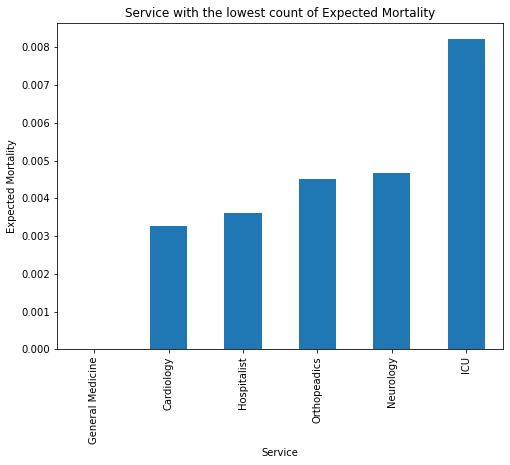

In [25]:
groupedData = (df_discharge.groupby('Service').ExpectedMortality.min()).sort_values()
groupedData.plot(kind='bar', figsize=(8, 6), title='Service with the lowest count of Expected Mortality',ylabel='Expected Mortality')


# 21 . Which reason of visit has maximum mortality rate.

In [26]:
df_discharge.loc[df_discharge["ExpectedMortality"].idxmax()]

AdmissionID                                    190
PatientID                                      572
AdmissionDate                  2018-02-14 00:00:00
DischargeDate           2018-02-25 13:02:30.113000
DischargeDisposition                       Expired
Service                                  Neurology
PrimaryDiagnosis                         Pneumonia
ExpectedLOS                              10.372029
ExpectedMortality                         0.989945
Name: 88, dtype: object

# 22. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [27]:
average_LOS = df_re_admission_registry.groupby(["DischargeDisposition","Service"])["ExpectedLOS"]
average_LOS.mean()

DischargeDisposition  Service         
Expired               Cardiology           9.202626
                      General Medicine     5.874003
                      Hospitalist          6.775636
                      ICU                  9.919063
                      Neurology            9.384312
                      Orthopeadics         3.943883
Home                  Cardiology          12.864936
                      General Medicine     6.105696
                      Hospitalist          8.009046
                      ICU                 13.451158
                      Neurology           12.538859
                      Orthopeadics         3.508337
Transfer              Cardiology          11.818403
                      General Medicine     6.116124
                      Hospitalist          5.701389
                      ICU                 11.989238
                      Neurology           11.469198
                      Orthopeadics         4.842255
Name: ExpectedLOS, dtype:

# 23. Add column 'Age' in Patient table.


In [28]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_patients['Date'] = (pd.to_datetime(df_patients['DateOfBirth']).dt.date).astype(str)
df_patients['Age'] = df_patients['Date'].apply(age)
df_patients

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language        Date  Age  
0                     White  English  1960-01-01   63  
1                     White  English  1985-11-15   37  
2                     White  English  1976-04-15   47  
3                     White  English  1968-10-15   54  
4                     White  English  1962-05-01   60  
..                      ...      ...         ...  ...  
940  Black/African-American  English  1986-05-26   36  
941  Black/African-American  English  1970-06-10   52  
942  Black/African-American  English  1983-01-08   40  
943  Black/African-American  English  1963-06-05   59  
944  Black/African-American  English  1972-08-06   50  

[945 rows x 9 columns]

# 24. Using arrays and loops, find the count of patients based on gender.


In [29]:
patients = np.array(df_patients['Gender'])
males = 0
females = 0

for i in range(0,len(patients)):
    if patients[i]=='Male':
        males+=1
    elif patients[i]=='Female':
        females+=1
        
        
print("Count of Male patients is :",males)
print("Count of Female patients is :",females)

Count of Male patients is : 537
Count of Female patients is : 408


# 25. Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'.

In [30]:
bins = [0.01,0.30,0.40,0.50,0.80]
labels = ['Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension']
df_re_admission_registry['Hypertension_Type'] = pd.cut(df_re_admission_registry['ExpectedMortality'], bins, labels = labels, include_lowest = True, right=False)
df_re_admission_registry

AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Hospitalist   Kidney Failure     6.717771   
1                   Home  General Medicine              Flu     3.825969   
2                   Home  General Medicine              Flu     3.382493   
3                   Home  General Medicine              Flu     3.763352   
4                   Home               ICU    Heart Failure    13.650953   
..                   ...               ...              ...          ...   
715                 Home        Cardiology              AMI    13.725405   
716                 Home               ICU        Pneumonia    11.355456   
717                 Home       Hospitalist        Pneumonia     4.819882   
718                 Home  General Medicine              Flu     3.123064   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ReadmissionFlag  DaysToReadmission  \
0             0.010046              NaN                NaN   
1             0.604562              1.0                2.0   
2             0.266137              1.0                3.0   
3             0.307527              1.0                4.0   
4             0.408898              NaN                NaN   
..                 ...              ...                ...   
715           0.388319              NaN                NaN   
716           0.088518              NaN                NaN   
717           0.503308              NaN                NaN   
718           0.655870              NaN                NaN   
719           0.286439              NaN                NaN   

     EDVisitAfterDischargeFlag        Date             Time  \
0                          NaN  2018-01-04  19:59:31.391000   
1                          1.0  2018-01-04  21:28:51.898000   
2                          1.0  2018-01-04  22:28:23.672000   
3                          1.0  2018-01-05  05:47:04.933000   
4                          NaN  2018-01-05  14:18:30.029000   
..                         ...         ...              ...   
715                        NaN  2018-03-07  21:22:10.061000   
716                        NaN  2018-03-08  02:43:18.749000   
717                        NaN  2018-03-08  09:27:18.377000   
718                        NaN  2018-03-10  06:06:12.068000   
719                        NaN  2018-03-10  20:38:30.568000   

       Hypertension_Type  
0      Mild Hypertension  
1    Severe Hypertension  
2      Mild Hypertension  
3              Moderate   
4      High Hypertension  
..                   ...  
715            Moderate   
716    Mild Hypertension  
717  Severe Hypertension  
718  Severe Hypertension  
719    Mild Hypertension  

[720 rows x 15 columns]

# 26: Plot a graph to show the distribution of expected mortality.

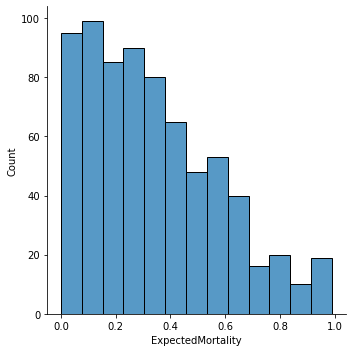

In [91]:
mortality = sns.displot(df_discharge, x="ExpectedMortality")

# 27. Which departmentID has maximum number of visits scheduled.

VisitDepartmentID
11    102
Name: DateScheduled, dtype: int64


<AxesSubplot:title={'center':'Visits Scheduled'}, xlabel='VisitDepartmentID', ylabel='Scheduled'>

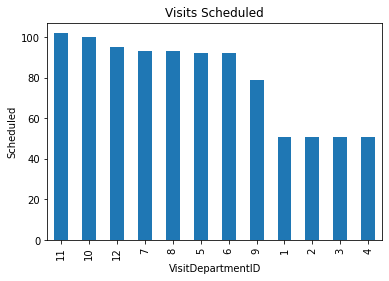

In [32]:
by_dept= (df_ambulatory_visits.groupby("VisitDepartmentID").count()["DateScheduled"]).sort_values(ascending=False)
print(by_dept.head(1))
by_dept.plot(kind='bar',title="Visits Scheduled", ylabel='Scheduled',xlabel='VisitDepartmentID')

# 28. Find the visit type with maximum 'No Show'.

In [33]:
df = (df_ambulatory_visits.query("VisitStatus == 'No Show'").groupby(["VisitType"])["VisitStatus"].count()).sort_values(ascending=False)
df.head(1)

VisitType
Telemedicine    74
Name: VisitStatus, dtype: int64

# 29. Which demographic patients are prone to get stroke?

In [34]:
joined_df = pd.merge(df_patients,df_discharge,on=["PatientID"])
stroke_df = joined_df[joined_df['PrimaryDiagnosis'] == 'Stroke']
race_prone_to_stroke_df = (stroke_df.groupby('Race').count()).sort_values('PrimaryDiagnosis', ascending=False)
print(race_prone_to_stroke_df.index[0] , "patients are prone to get stroke.")

Black/African-American patients are prone to get stroke.


# 30. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.


In [35]:
df_providers.loc[df_providers['ProviderID'].between(11, 20) & (df_providers['ProviderSpecialty'] == 'Surgery')]

ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff  \
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468   
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762   
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705   
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436   
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326   
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862   

    Experience  
10          25  
11          25  
12          25  
13          24  
14          23  
15          22

# 31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [36]:
df_patients.loc[df_patients['Gender'] == 'Male', 'full_name'] = ("Mr."+df_patients["FirstName"]+" "+df_patients["LastName"])
df_patients.loc[df_patients['Gender'] == 'Female', 'full_name'] = ("Ms."+df_patients["FirstName"]+" "+df_patients["LastName"])
df_patients

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language        Date  Age            full_name  
0                     White  English  1960-01-01   63         Mr.Lanni Sue  
1                     White  English  1985-11-15   37         Mr.Far Myers  
2                     White  English  1976-04-15   47   Mr.Devlin  Michael  
3                     White  English  1968-10-15   54     Mr.Carmine Texas  
4                     White  English  1962-05-01   60        Mr.Tann  Bama  
..                      ...      ...         ...  ...                  ...  
940  Black/African-American  English  1986-05-26   36       Mr.Wat Fideler  
941  Black/African-American  English  1970-06-10   52   Mr.Wandie Baythrop  
942  Black/African-American  English  1983-01-08   40   Mr.Diahann Smeeton  
943  Black/African-American  English  1963-06-05   59  Mr.Panchito Sharple  
944  Black/African-American  English  1972-08-06   50      Mr.Walsh Calvie  

[945 rows x 10 columns]

# 32. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

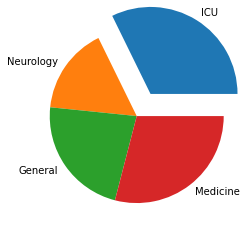

In [37]:
service = ["ICU", "Neurology", "General", "Medicine"] 
ExpectedLOS = [10,5,7,9]
explode = []
for x in ExpectedLOS :
    if x == max(ExpectedLOS):
        explode.append(.3)
    else:
        explode.append(0)

plt.pie(ExpectedLOS, labels = service, explode = explode)
plt.show()

#  33. Plot a graph to show the distribution of expected length of stay.

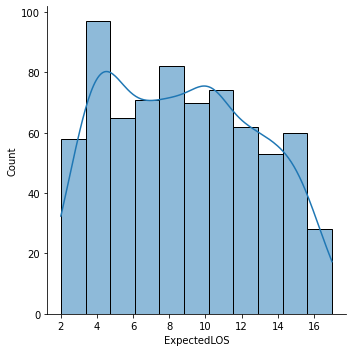

In [38]:
sns.displot(df_discharge, x="ExpectedLOS",kde=True)

# 34. Create a WordCloud Chart with Reason For Visit

In [39]:
#text = df_ed_visits["ReasonForVisit"]
#wordcloud = plt.wordcloud().generate(text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

# 35. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [40]:
arr = np.arange(1,31).reshape(6,5)
slice1 = arr[0,3:]
slice2 = arr[4:,3:]

flatten_array = np.concatenate((slice1.flatten(), slice2.flatten()))
print(flatten_array)

for element in flatten_array:
    if element < 6:
        print("-1")
    else:
        print("99")

[ 4  5 24 25 29 30]
-1
-1
99
99
99
99


# 36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)


In [41]:
hypertension_prone_count = df_ambulatory_visits["PatientMRN"][(df_ambulatory_visits["BloodPressureSystolic"]>180)  & (df_ambulatory_visits["BloodPressureDiastolic"]>120) ].count()
print("The count of patients who are prone to hypertension crisis is :", hypertension_prone_count)


The count of patients who are prone to hypertension crisis is : 101


# 37. Display the data where actual LOS is greater than expected LOS.

In [42]:
df_discharge['ActualLOS'] = (pd.to_datetime(df_discharge['DischargeDate']) - pd.to_datetime(df_discharge['AdmissionDate'])).dt.seconds/3600
result_df = df_discharge.loc[df_discharge['ActualLOS'] > df_discharge['ExpectedLOS']]
result_df

AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
5            395        109    2018-01-07 2018-01-22 17:57:37.103   
7            259        116    2018-01-08 2018-01-20 03:40:53.605   
..           ...        ...           ...                     ...   
712          703        703    2018-02-21 2018-02-27 08:53:38.211   
713          709        708    2018-02-21 2018-03-01 05:59:22.116   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                Expired        Cardiology              AMI     9.646857   
2                Expired        Cardiology   Kidney Failure     6.580273   
4                Expired        Cardiology       Broken Leg     2.639297   
5                Expired        Cardiology              Flu     2.981758   
7                Expired        Cardiology       Broken Leg     2.279624   
..                   ...               ...              ...          ...   
712             Transfer  General Medicine        Pneumonia     3.539165   
713             Transfer  General Medicine         Diabetes     4.518876   
716             Transfer               ICU    Heart Failure    10.262312   
717             Transfer  General Medicine        Pneumonia     6.036234   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ActualLOS  
0             0.061540  18.101667  
2             0.573887  16.268333  
4             0.055468  13.543333  
5             0.192976  17.960278  
7             0.491274   3.681389  
..                 ...        ...  
712           0.275691   8.893889  
713           0.455570   5.989444  
716           0.812930  15.150556  
717           0.094128   7.992222  
719           0.286439  20.641667  

[431 rows x 10 columns]

# 38. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [43]:
(df_patients["FirstName"] +" "+ df_patients["LastName"]).loc[(df_patients.index > 100) & (df_patients.index < 201)  ] 

101      Gipsy Frankton
102       Jethro Wharin
103         Viv Aylward
104     Swift Dreschler
105    Fadel Jacquemard
             ...       
196       Noam Laguerre
197        Arie Bayless
198      Janaye O'Mohun
199          Fonz Group
200     Cummings Pickup
Length: 100, dtype: object

# 39. Delete the column 'DischargeDispostion' iteratively.

In [44]:
for col in df_re_admission_registry.columns:
    if col == 'DischargeDisposition':
        del df_re_admission_registry[col]
df_discharge

AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
1            257         93    2018-01-06 2018-01-18 02:59:04.667   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
..           ...        ...           ...                     ...   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                Expired        Cardiology              AMI     9.646857   
1                Expired        Cardiology       Broken Leg     6.816558   
2                Expired        Cardiology   Kidney Failure     6.580273   
3                Expired        Cardiology             Afib    12.794536   
4                Expired        Cardiology       Broken Leg     2.639297   
..                   ...               ...              ...          ...   
715             Transfer               ICU    Heart Failure    11.362095   
716             Transfer               ICU    Heart Failure    10.262312   
717             Transfer  General Medicine        Pneumonia     6.036234   
718             Transfer               ICU    Heart Failure    13.323413   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ActualLOS  
0             0.061540  18.101667  
1             0.628827   2.984444  
2             0.573887  16.268333  
3             0.222163   4.809167  
4             0.055468  13.543333  
..                 ...        ...  
715           0.370695   3.518056  
716           0.812930  15.150556  
717           0.094128   7.992222  
718           0.490892  12.531944  
719           0.286439  20.641667  

[720 rows x 10 columns]

# 40. Create a jointplot on expected mortality & expected length of stay.

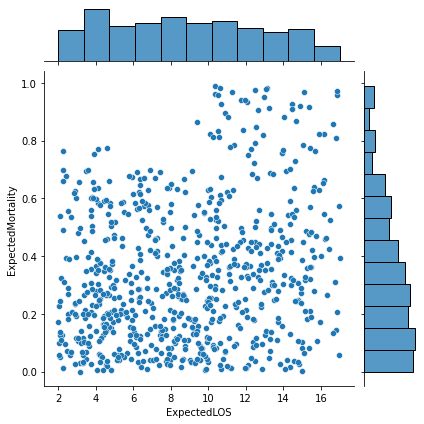

In [45]:
sns.jointplot(data=df_discharge, x='ExpectedLOS', y='ExpectedMortality', palette='Set2')  #, kind='kde'
plt.show()

# 41. Find the age prone to get stroke.


In [92]:
joined_df = pd.merge(df_patients,df_discharge,on=["PatientID"])
stroke_df = joined_df[joined_df['PrimaryDiagnosis'] == 'Stroke']
age_prone_to_stroke_df = (stroke_df.groupby('Age').count()).sort_values('PrimaryDiagnosis', ascending=False)
print("The age prone to get stroke is :",age_prone_to_stroke_df.index[0])

The age prone to get stroke is : 58


# 42. Calculate mortality by diagnosis.


In [47]:
by_diaganosis = df_re_admission_registry.groupby("PrimaryDiagnosis").count()
by_diaganosis["ExpectedMortality"]

PrimaryDiagnosis
AMI                    48
Afib                   11
Broken Leg              9
Diabetes               64
Fever                  19
Flu                    80
Heart Failure          78
Hip Fracture           23
Hypertension           50
Kidney Failure         20
Knee Replacement       23
Laceration             29
Migraine               12
Pain                    7
Pneumonia             177
Spinal Cord Injury      2
Stroke                 68
Name: ExpectedMortality, dtype: int64

# 43. Details of patients whose first name or last name contains "lau"

In [48]:
df_patients[(df_patients['FirstName'].str.contains("lau", case = False) ) | (df_patients['LastName'].str.contains("lau",case = False))]




PatientID FirstName   LastName             DateOfBirth  Gender  \
282        283    Lauren     Gaskal 1962-05-08 01:54:00.111  Female   
322        323    Lauren      Foort 1960-06-23 20:07:53.045  Female   
369        370    Zulauf  Ellingham 1982-12-17 16:27:56.391  Female   
382        383    Zulauf        LLC 1969-03-16 07:48:49.338  Female   
454        455    Zulauf      Alvar 1961-10-02 08:24:17.334  Female   
463        464    Zulauf     Manske 1965-06-22 02:49:28.667  Female   
818        819    Zulauf   Bitcheno 1967-04-02 07:17:53.635  Female   
830        831    Zulauf  O'Shavlan 1970-05-17 08:09:28.988  Female   
850        851     Lemmy    Klausen 1973-06-18 06:19:43.475  Female   
906        907  Jerrilyn    Klausen 1979-09-04 13:05:57.870    Male   
910        911    Zulauf     Orbine 1973-06-26 03:13:50.449    Male   

                       Race Language        Date  Age            full_name  
282  Black/African-American  English  1962-05-08   60     Ms.Lauren Gaskal  
322                   White  English  1960-06-23   62      Ms.Lauren Foort  
369                   White  English  1982-12-17   40  Ms.Zulauf Ellingham  
382                   White  English  1969-03-16   54        Ms.Zulauf LLC  
454                   White  English  1961-10-02   61      Ms.Zulauf Alvar  
463                   White  English  1965-06-22   57     Ms.Zulauf Manske  
818                   White  English  1967-04-02   56   Ms.Zulauf Bitcheno  
830                   White  English  1970-05-17   52  Ms.Zulauf O'Shavlan  
850                   White  English  1973-06-18   49     Ms.Lemmy Klausen  
906  Black/African-American  English  1979-09-04   43  Mr.Jerrilyn Klausen  
910  Black/African-American  English  1973-06-26   49     Mr.Zulauf Orbine

# 44. Display data by splitting age in 4 quartiles and labeling the quartiles.


In [49]:
df_patients['Quartile'], cut_bin = pd.qcut(df_patients['Age'], q = 4, labels = ['A','B', 'C', 'D'], retbins = True)
df_patients

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language        Date  Age            full_name  \
0                     White  English  1960-01-01   63         Mr.Lanni Sue   
1                     White  English  1985-11-15   37         Mr.Far Myers   
2                     White  English  1976-04-15   47   Mr.Devlin  Michael   
3                     White  English  1968-10-15   54     Mr.Carmine Texas   
4                     White  English  1962-05-01   60        Mr.Tann  Bama   
..                      ...      ...         ...  ...                  ...   
940  Black/African-American  English  1986-05-26   36       Mr.Wat Fideler   
941  Black/African-American  English  1970-06-10   52   Mr.Wandie Baythrop   
942  Black/African-American  English  1983-01-08   40   Mr.Diahann Smeeton   
943  Black/African-American  English  1963-06-05   59  Mr.Panchito Sharple   
944  Black/African-American  English  1972-08-06   50      Mr.Walsh Calvie   

    Quartile  
0          D  
1          A  
2          B  
3          C  
4          D  
..       ...  
940        A  
941        C  
942        A  
943        D  
944        C  

[945 rows x 11 columns]

# 45. Usage of Enumeration in Python with any example

In [50]:
drinks = ['tea', 'coffee', 'cappuccino', 'lemonade']
for elements in enumerate(drinks):
    print(elements)
    
#changing index and printing separately
for count, elements in enumerate(drinks,100):
    print(count,elements)
# getting desired output
for count, element in enumerate(drinks,100):
    print(count)
    print(element)

(0, 'tea')
(1, 'coffee')
(2, 'cappuccino')
(3, 'lemonade')
100 tea
101 coffee
102 cappuccino
103 lemonade
100
tea
101
coffee
102
cappuccino
103
lemonade


# 46.Count of cancelled status

In [51]:
new_df = df_ambulatory_visits[df_ambulatory_visits['VisitStatus']=='Canceled']["VisitID"]
print("Count of cancelled status is :",new_df.count())

Count of cancelled status is : 60


# 47. Display the patient details with maximum pulse pressure.


In [52]:
df_ambulatory_visits[df_ambulatory_visits['Pulse']==df_ambulatory_visits['Pulse'].max()]

VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
495      174         812          22  2019-02-19 2019-01-31 21:32:02.485   

     VisitDepartmentID  VisitType  BloodPressureSystolic  \
495                  6  Follow Up                  182.0   

     BloodPressureDiastolic      Pulse VisitStatus  
495              115.899432  99.986463   Completed

# 48. Create a heat map to show the correlation between the column values of Edvisits.


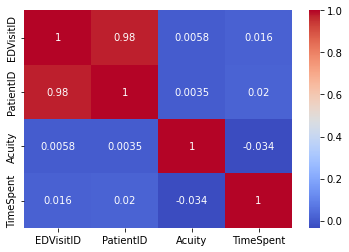

In [53]:
ed_visit = df_ed_visits.corr()
sns.heatmap(ed_visit,cmap = "coolwarm", annot=True)
plt.show()

# 49. Plot a graph by counting the no. of patients in each department.


<AxesSubplot:title={'center':'No. of Patients per Department'}, xlabel='PatientMRN', ylabel='VisitDepartmentID'>

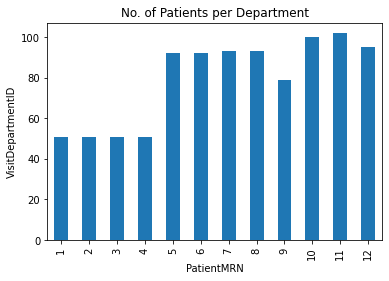

In [54]:
by_dept = df_ambulatory_visits.groupby("VisitDepartmentID").count()["PatientMRN"]
by_dept.plot(kind='bar',title="No. of Patients per Department", ylabel='VisitDepartmentID',
         xlabel='PatientMRN')

# 50. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.


In [55]:
df_ed_visits[(df_ed_visits["ReasonForVisit"].isin(["Migrane","Pneumonia"])) & (df_ed_visits["Acuity"] > 2)]

EDVisitID  PatientID               VisitDate         EDDischargeTime  \
12          30         30 2020-01-01 07:25:54.177 2020-01-01 23:30:20.151   
13          31         31 2020-01-01 07:32:51.917 2020-01-01 19:55:46.991   
16          44         44 2020-01-01 11:41:20.981 2020-01-02 05:18:13.677   
21          53         53 2020-01-01 14:28:21.684 2020-01-01 22:29:33.906   
24          56         55 2020-01-01 15:02:36.206 2020-01-02 10:40:08.571   
..         ...        ...                     ...                     ...   
488       1145        891 2020-01-14 22:17:55.508 2020-01-15 15:14:49.962   
491       1158        904 2020-01-15 02:06:42.088 2020-01-15 07:04:01.523   
496       1167        913 2020-01-15 05:09:22.987 2020-01-16 03:57:13.244   
499       1170        916 2020-01-15 05:57:29.834 2020-01-15 06:03:50.631   
501       1172        918 2020-01-15 06:51:43.655 2020-01-15 16:27:42.410   

     Acuity ReasonForVisit EDDisposition  TimeSpent  
12        3      Pneumonia      Admitted  16.073611  
13        4      Pneumonia      Admitted  12.381944  
16        4      Pneumonia      Admitted  17.614444  
21        4      Pneumonia      Admitted   8.020000  
24        4      Pneumonia      Admitted  19.625556  
..      ...            ...           ...        ...  
488       4      Pneumonia      Admitted  16.948333  
491       4      Pneumonia      Admitted   4.955278  
496       4      Pneumonia      Admitted  22.797222  
499       4      Pneumonia      Admitted   0.105556  
501       5      Pneumonia      Admitted   9.599444  

[90 rows x 8 columns]

# 51. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.


In [56]:
reason = input("Enter the reason of visit to find the number of patients admitted with that reason: ").lower()
df_ed_visits['ReasonForVisit'] = df_ed_visits['ReasonForVisit'].apply(str.lower)
if reason in df_ed_visits["ReasonForVisit"].values:
    by_reason = df_ed_visits.groupby("ReasonForVisit").count()["PatientID"]
    print(f"{by_reason.loc[reason]} patients are admitted for {reason}")
else:
    print("Enter a valid reason of visit")

Enter the reason of visit to find the number of patients admitted with that reason: Stomach Ache
186 patients are admitted for stomach ache


# 52. Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


In [57]:
df_ambulatory_visits.loc[df_ambulatory_visits["BloodPressureSystolic"].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

# 53. Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).


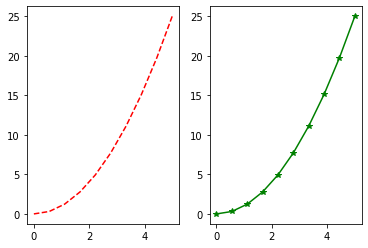

In [58]:
x = np.linspace(0,5,10)
y = x ** 2

x
y
plt.subplot(1,2,1)
plt.plot(x,y,"r--")
plt.subplot(1,2,2)
plt.plot(x,y,"g*-")

# 54. Retrieve the row with minimum DBP using sorting technique.


In [59]:
df_ambulatory_visits.sort_values(by=["BloodPressureDiastolic"]).head(1)


VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
757      163         801          11  2019-02-08 2019-02-07 23:41:12.181   

     VisitDepartmentID  VisitType  BloodPressureSystolic  \
757                  7  Follow Up                  120.0   

     BloodPressureDiastolic      Pulse VisitStatus  
757               51.695653  53.310495   Completed

# 55. Replace all the null values in ReadmissionFlag with 0.


In [60]:
df_re_admission_registry["ReadmissionFlag"].fillna(0, inplace=True)
df_re_admission_registry["ReadmissionFlag"]

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

# 56. Get the list of patient ID's which are not there in ReadmissionRegistry.


In [61]:
common = df_patients.merge(df_re_admission_registry, on=["PatientID"])
df_patients[(~df_patients.PatientID.isin(common.PatientID))]["PatientID"].values


array([  4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743,
       744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
       757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
       770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
       783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
       796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821,
       822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834,
       835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847,
       848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860,
       861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873,
       874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 88

# 57. Find reasonForVisit with highest count of acuity 5 patients.


In [62]:
filtered_df = df_ed_visits[df_ed_visits['Acuity'] == 5]
grouped_df = filtered_df.groupby('ReasonForVisit').count()
sorted_df = grouped_df.sort_values('Acuity', ascending = False)
print("The reason for visit with highest count of acuity 5 patients is :",sorted_df.index[0])

The reason for visit with highest count of acuity 5 patients is : chest pain


# 58. Display full name of patients who are born in 1986.


In [63]:
(df_patients["FirstName"]+" "+df_patients["LastName"]).where(df_patients['DateOfBirth'].dt.year == 1986).dropna()


23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object

# 59. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.


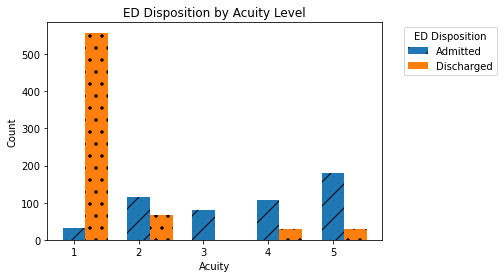

In [64]:
acuity_levels = df_ed_visits['Acuity'].unique()
dispositions = df_ed_visits['EDDisposition'].unique()

# Create a dictionary to store the counts of each unique value
counts = {}
for acuity_level in acuity_levels:
    counts[acuity_level] = {}
    for disposition in dispositions:
        counts[acuity_level][disposition] = len(df_ed_visits[(df_ed_visits['Acuity'] == acuity_level) & (df_ed_visits['EDDisposition'] == disposition)])

# Define hatch patterns for each disposition
hatches = {
    'Admitted': '/',
    'Discharged': '.'
}


fig, ax = plt.subplots()
for i, acuity_level in enumerate(acuity_levels):
    bar_width = 0.7 / len(dispositions)
    for j, disposition in enumerate(dispositions):
        x = i + j * bar_width
        y = counts[acuity_level][disposition]
        ax.bar(x, y, bar_width, color='C{}'.format(j), label=disposition if i == 0 else None)
        ax.patches[-1].set_hatch(hatches[disposition])


ax.set_xticks(range(len(acuity_levels)))
ax.set_xticklabels(acuity_levels)

ax.set_xlabel('Acuity')
ax.set_ylabel('Count')
ax.set_title('ED Disposition by Acuity Level')

ax.legend(title='ED Disposition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# 60. Create a heat map on Readmission Registry table to find correlation between columns values.


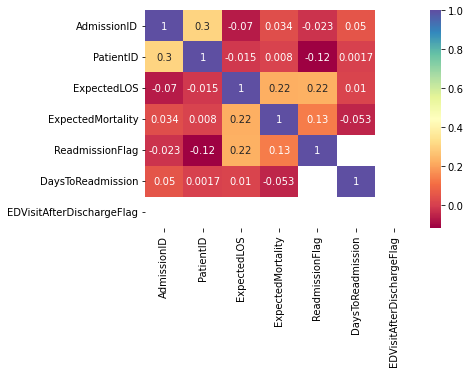

In [65]:
readmission_registry = df_re_admission_registry.corr()
sns.heatmap(readmission_registry,cmap = "Spectral", annot=True)
plt.show()

# 61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [66]:
arr = np.arange(1,31).reshape(6,5)
print(arr[2,:2],arr[3,:2])

[11 12] [16 17]


# 62. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [67]:
data = {
    'Acuity': df_ed_visits['Acuity'],
    'EDDisposition': df_ed_visits['EDDisposition']
       }
df = pd.DataFrame(data)
df_count = df.groupby(['Acuity', 'EDDisposition']).size().reset_index(name='Count')
df_count.set_index(['Acuity', 'EDDisposition'], inplace=True)
df_count

Count
Acuity EDDisposition       
1      Admitted          32
       Discharged       558
2      Admitted         116
       Discharged        66
3      Admitted          81
4      Admitted         107
       Discharged        30
5      Admitted         179
       Discharged        30

# 63. List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [68]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_patients['Date'] = ((pd.to_datetime(df_patients['DateOfBirth']).dt.date).astype(str))
df_patients['Age'] = df_patients['Date'].apply(age)
df_male_patients = df_patients.set_index('Gender').filter(like='Male', axis=0)
df_amb_visits_1 = df_ambulatory_visits.rename(columns={'PatientMRN': 'PatientID'})
df_join_amb_visits = pd.merge(df_male_patients, df_amb_visits_1,  on = 'PatientID', how='inner')
df_providers_surgery = df_providers.set_index('ProviderSpecialty').filter(like='Surgery', axis=0)
df_surgery_ambvisits = pd.merge(df_join_amb_visits, df_providers_surgery,  on = 'ProviderID', how='inner')
df_surgery_patients = df_surgery_ambvisits.loc[(df_surgery_ambvisits['Age']>60) & (df_surgery_ambvisits['DateScheduled'].between('2019-01-01','2019-04-01'))]
df_surgery_patients

PatientID  FirstName   LastName             DateOfBirth  \
16        581  Constanta      Edgin 1960-06-06 08:19:25.534   
24         15    Gabriel      Saint 1961-11-18 06:47:20.682   
30        802      Berta      Loxly 1961-05-19 21:00:01.885   
55        876      Gerty  Gheorghie 1962-03-08 09:17:10.706   

                      Race Language        Date  Age           full_name  \
16  Black/African-American  English  1960-06-06   62  Mr.Constanta Edgin   
24                   White  Spanish  1961-11-18   61    Mr.Gabriel Saint   
30                   White  English  1961-05-19   61      Mr.Berta Loxly   
55                   White  English  1962-03-08   61  Mr.Gerty Gheorghie   

   Quartile  ...           DateScheduled  VisitDepartmentID     VisitType  \
16        D  ... 2019-02-11 07:28:05.541                  7  Telemedicine   
24        D  ... 2019-01-08 11:44:52.773                 12           New   
30        D  ... 2019-01-16 17:53:41.867                  8     Follow Up   
55        D  ... 2019-03-29 14:19:44.381                  7  Telemedicine   

   BloodPressureSystolic  BloodPressureDiastolic      Pulse  VisitStatus  \
16                 179.0              113.061708  84.869647    Completed   
24                 133.0               84.997205  62.342676    Completed   
30                   NaN                     NaN        NaN    Completed   
55                 142.0               86.553402  60.834514      No Show   

    ProviderName     ProviderDateOnStaff Experience  
16  Kim Kimberly 1998-05-10 14:47:29.468         25  
24      Sarah Ab 1998-08-18 05:22:40.762         25  
30      Sarah Ab 1998-08-18 05:22:40.762         25  
55       Dave Yu 1999-06-26 16:18:57.436         24  

[4 rows x 23 columns]

# 64. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [69]:
splitName = pd.DataFrame(df_providers['ProviderName'])
splitName[['FirstName','LastName']] = splitName['ProviderName'].str.split(expand = True)
splitName
# Drop the Provider Name column
splitName.drop('ProviderName', axis=1, inplace=True)
splitName

FirstName  LastName
0       Sally       Sue
1        Mike     Myers
2      Jordan   Michael
3         Ted     Texas
4         Ala      Bama
5       Harry      Kane
6       Barry       Bar
7         Ted     Green
8         Ted     Black
9        Fred       Man
10        Kim  Kimberly
11      Sarah        Ab
12    Abigail   Marriot
13       Dave        Yu
14  Christian     Saint
15      Perry    Pardon
16       Kent   Kendall
17       Ryan     Kevin
18      Tyler    Conner
19     Bailey    Barret
20      Megan     Bonco
21     Joesph    Walter
22     Walter      King
23       Luke      Long
24     Justin      Time
25       Mike    Joseph
26    Bridget    Brenda
27     Brenda      Bing
28   Chandler      Bing
29     Joesph      Ross
30     Dwight     Scott
31    Michael   Halpert
32     Pamela      Ding
33       Tony     Creed
34    Phyllis   Stanley
35      Holly       Hue
36      Trent       Tye
37   Kimberly      Cone
38      Harry      West
39      Rosie    Renter

# 65. Plot a graph showing the count of patients for the reason visited the hospital.

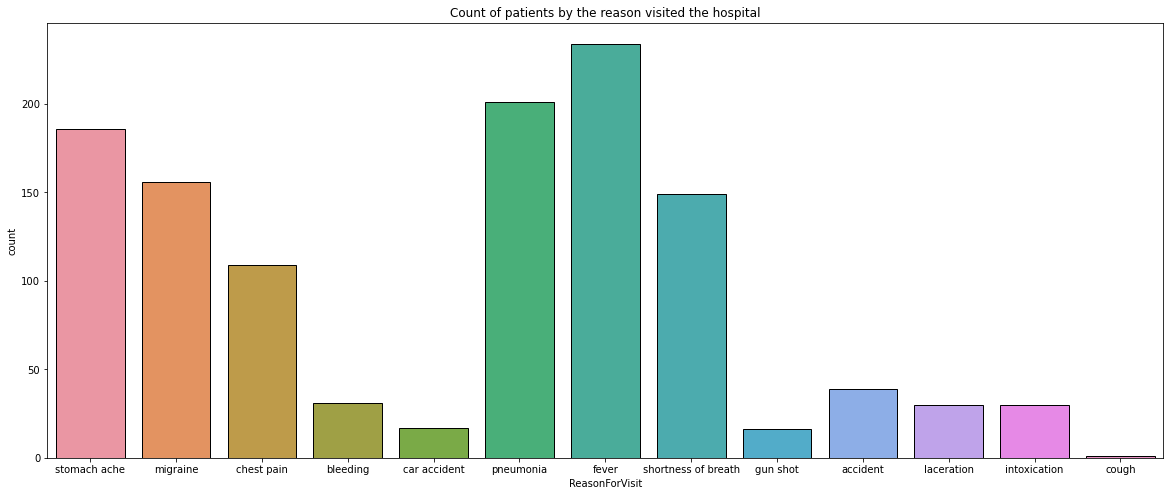

In [70]:
plt.figure(figsize=(20,8))
plt.title('Count of patients by the reason visited the hospital')
sns.countplot(data = df_ed_visits,x = 'ReasonForVisit', edgecolor='black')
plt.show()

# 66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [71]:
migrainePatientIDs = df_ed_unique[df_ed_unique['ReasonForVisit']=='Migraine']['PatientID']
migrainePatients = df_patients[df_patients['PatientID'].isin(migrainePatientIDs)]
(migrainePatients[['FirstName','LastName','DateOfBirth']])

FirstName  LastName             DateOfBirth
1         Far     Myers 1985-11-15 02:08:42.090
2     Devlin    Michael 1976-04-15 02:52:09.762
11     Zonnya        Ab 1963-05-23 10:04:33.074
13        Gan        Yu 1970-06-02 06:22:54.675
21     Joesph      Long 1979-12-04 16:45:56.080
..        ...       ...                     ...
896   Barrows  Coupland 1979-10-31 18:28:35.483
907      Knox     Group 1975-08-25 22:27:50.177
909   Kuvalis  Coupland 1986-05-23 19:23:27.752
914  Jerrilyn     Dyson 1978-01-18 02:41:55.178
923    Daniel  Shakesby 1980-11-28 17:57:03.702

[116 rows x 3 columns]

# 67. Make a pivot table by the no. of patients from the admission date till discharge date.

In [72]:
df_discharge['LOS'] = pd.to_datetime(df_discharge['DischargeDate']) - pd.to_datetime(df_discharge['AdmissionDate'])
pivot_table = pd.pivot_table(df_discharge,values = ['PatientID'] ,index = ['AdmissionDate', 'LOS'], aggfunc = 'count')
pivot_table

PatientID
AdmissionDate LOS                               
2018-01-01    3 days 19:59:31.391000           1
              3 days 21:28:51.898000           1
              3 days 22:28:23.672000           1
              4 days 05:47:04.933000           1
              4 days 14:18:30.029000           1
...                                          ...
2018-02-22    13 days 21:22:10.061000          1
              14 days 02:43:18.749000          1
              14 days 09:27:18.377000          1
              16 days 06:06:12.068000          1
              16 days 20:38:30.568000          1

[720 rows x 1 columns]

# 68.Calculate average LOS

In [73]:
#df_discharge['ExpectedLOS'].mean()

actualLOS = (pd.to_datetime(df_discharge['DischargeDate']) - pd.to_datetime(df_discharge['AdmissionDate'])).dt.seconds/3600
print("The average LOS is :", round(actualLOS.mean(),2))

The average LOS is : 11.79


# 69. Number of patients on 'Transfer' based on primary diagnosis.

In [74]:
#transferPatients = df_discharge[df_discharge['DischargeDisposition']=='Transfer']
#print('Number of patients on Transfer based on primary diagnosis is :',len(transferPatients) )

# 70. Violin plot for Level of Acuity by Visit Reason

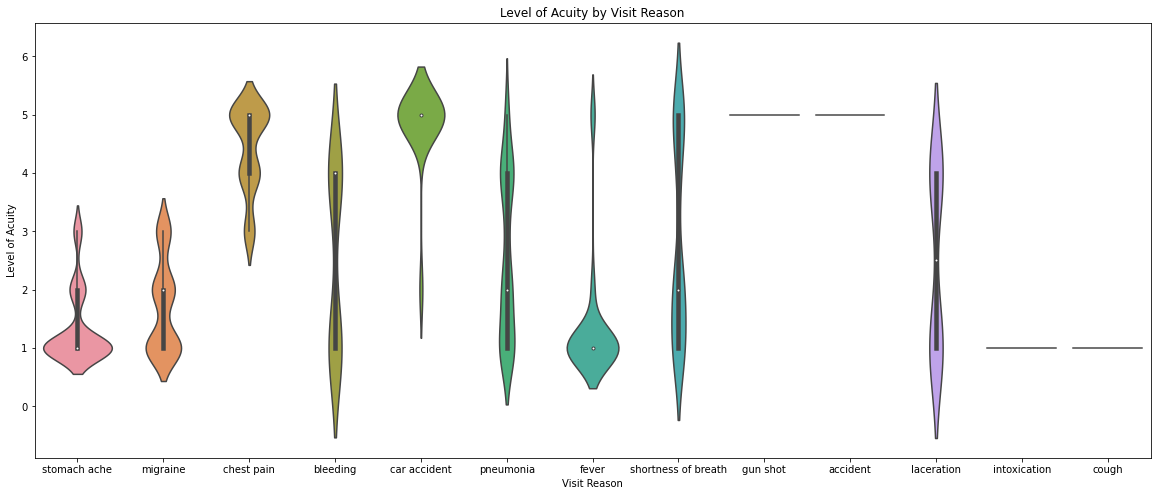

In [75]:
plt.figure(figsize=(20,8))
sns.violinplot(data = df_ed_visits, x = 'ReasonForVisit' , y = 'Acuity')
plt.title('Level of Acuity by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Level of Acuity')
plt.show()

# 71. Find the count of White Spanish Male.

In [76]:
whiteSpanishMale = df_patients[(df_patients['Race']=='White') & (df_patients['Gender']=='Male') & (df_patients['Language']=='Spanish')]
count = len(whiteSpanishMale)
print("The count of White Spanish Male is:", count)

The count of White Spanish Male is: 15


# 72. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [77]:
diagnosis = df_discharge.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(lambda x: max(x) - min(x))
sort_diff = diagnosis.sort_values(ascending=False)
print("Primary diagnosis with the biggest difference between maximum and minimum Expected LOS: ",sort_diff.index[0])

Primary diagnosis with the biggest difference between maximum and minimum Expected LOS:  Pneumonia


# 73. Which patient id has most entries in readmission registry.

In [78]:
df_re_admission_registry['PatientID'].value_counts().index[0]

23

# 74. "Create a figure object called fig using plt.figure() **

** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels. Note : You can plot on any x,y set of values."

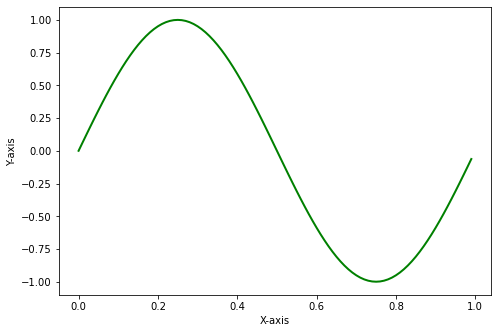

In [79]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
x = np.arange(0.0, 1.0, 0.01)
y = np.sin(2 * np.pi * x)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.plot(x,y,color='green',lw=2)
plt.show()

# 75. "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"

In [80]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
np.dot(a,b)

array([[10, 13],
       [28, 40]])

# 76. Mortality O:E

In [81]:
observedMortality = len(df_discharge[df_discharge['DischargeDisposition']=='Expired'])
expectedMortality = df_discharge['ExpectedMortality'].sum().round(2).astype(int)
OE_ratio = (observedMortality/expectedMortality)
print("The Mortality O:E is", round(OE_ratio,2))

The Mortality O:E is 0.43


# 77. Plot a graph to count the patients based on discharge disposition.

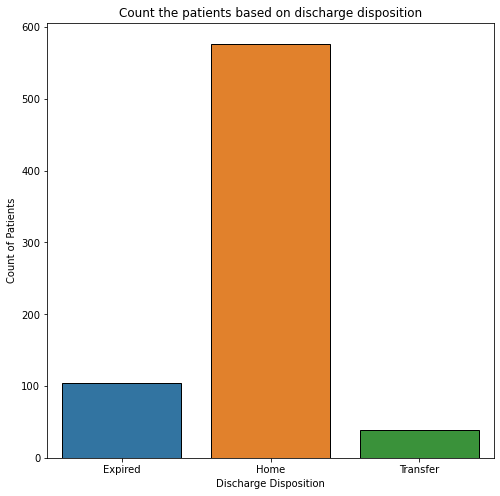

In [88]:
plt.figure(figsize=(8,8))
sns.countplot(data = df_discharge,x = 'DischargeDisposition',edgecolor='black' )
plt.title('Count the patients based on discharge disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count of Patients')
plt.show()

# 78. Display total count of patients service wise based on gender.

In [83]:
mergedData =  pd.merge(df_discharge,df_patients, on = 'PatientID')
df_count = mergedData.groupby(['Gender','Service']).size().reset_index(name = 'Count')
df_count.set_index(['Gender','Service'],inplace=True)
df_count

Count
Gender Service                
Female Cardiology           41
       General Medicine    114
       Hospitalist          35
       ICU                  65
       Neurology            34
       Orthopeadics         22
Male   Cardiology           54
       General Medicine    149
       Hospitalist          66
       ICU                  86
       Neurology            31
       Orthopeadics         23

# 79.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [84]:
df_discharge['LOS'] = pd.to_datetime(df_discharge['DischargeDate']) - pd.to_datetime(df_discharge['AdmissionDate'])
pivot_table = pd.pivot_table(df_discharge,values = ['LOS'] ,index = ['Service', 'PrimaryDiagnosis'], aggfunc = 'mean')
pivot_table

LOS
Service          PrimaryDiagnosis                             
Cardiology       AMI                   10 days 17:50:17.068400
                 Afib                  11 days 16:43:04.519200
                 Broken Leg         10 days 22:44:11.476333333
                 Flu                   12 days 10:08:21.363000
                 Heart Failure       9 days 22:33:05.353871794
                 Kidney Failure         4 days 16:16:06.782000
General Medicine Broken Leg         13 days 06:02:10.045666666
                 Diabetes           10 days 20:03:59.416736842
                 Fever               8 days 11:16:36.716307692
                 Flu                10 days 10:02:10.029796296
                 Hypertension        9 days 11:41:31.025285714
                 Kidney Failure        11 days 04:34:51.031000
                 Laceration          9 days 22:50:48.247238095
                 Pneumonia           9 days 21:13:40.546417910
                 Stroke                11 days 18:15:50.278900
Hospitalist      AMI                   10 days 00:30:31.743000
                 Broken Leg          8 days 06:38:49.924666666
                 Diabetes            9 days 07:46:16.835153846
                 Fever              10 days 21:50:58.966666666
                 Flu                 9 days 05:05:03.015473684
                 Hypertension       11 days 07:55:37.157333333
                 Kidney Failure     10 days 14:39:50.273666666
                 Knee Replacement       6 days 16:40:18.171000
                 Laceration          9 days 13:37:12.731714285
                 Pneumonia           9 days 10:49:58.554321428
                 Stroke                16 days 14:13:23.627000
ICU              AMI                   12 days 14:59:32.471600
                 Afib                   6 days 22:18:35.647000
                 Fever                 13 days 22:11:21.610000
                 Flu                 8 days 09:49:41.249333333
                 Heart Failure       9 days 22:36:01.571181818
                 Hypertension           8 days 20:04:45.589750
                 Kidney Failure        11 days 13:33:12.198000
                 Laceration            15 days 06:58:47.690000
                 Pneumonia           8 days 17:45:16.204662337
                 Spinal Cord Injury    10 days 14:06:30.254500
                 Stroke             10 days 22:19:35.242380952
Neurology        AMI                    9 days 07:53:41.872500
                 Flu                    7 days 19:17:45.169000
                 Heart Failure      13 days 14:46:28.502166666
                 Hypertension           9 days 18:36:03.262200
                 Migraine            9 days 00:19:27.839166666
                 Pain                  10 days 21:28:22.693000
                 Pneumonia             10 days 04:09:23.866600
                 Stroke             10 days 00:19:40.793192307
Orthopeadics     Hip Fracture        9 days 17:32:33.319695652
                 Knee Replacement    9 days 21:53:09.485727272

# 80. Display the data for all 'White Female' patients above the age of 50.

In [85]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,born.day))
df_patients['Date'] = (pd.to_datetime(df_patients['DateOfBirth']).dt.date).astype(str)
df_patients['Age'] = df_patients['Date'].apply(age)

df_patients[(df_patients['Race'] == 'White') & (df_patients['Gender'] == 'Female') & (df_patients['Age']>50)]

PatientID  FirstName   LastName             DateOfBirth  Gender   Race  \
28          29        Ted      Scott 1967-12-09 05:01:37.892  Female  White   
30          31      Harry       Ding 1960-10-08 01:42:51.212  Female  White   
33          34        Ted        Hue 1960-11-28 18:05:11.459  Female  White   
34          35       Fred        Tye 1966-04-14 06:01:07.169  Female  White   
39          40  Christian        Pow 1971-12-07 11:47:43.885  Female  White   
..         ...        ...        ...                     ...     ...    ...   
865        866   Jermayne    Lowndes 1970-12-09 04:49:48.933  Female  White   
866        867       Gail        Inc 1967-03-10 08:18:47.908  Female  White   
867        868        Des  Heindrick 1969-08-15 11:05:30.165  Female  White   
869        870      Hauck    Rubbens 1963-11-16 03:31:38.929  Female  White   
873        874  Schroeder   McGarvey 1971-12-09 11:56:22.068  Female  White   

    Language        Date  Age              full_name Quartile  
28   Spanish  1967-12-09   55           Ms.Ted Scott        C  
30   Spanish  1960-10-08   62          Ms.Harry Ding        D  
33   Spanish  1960-11-28   62             Ms.Ted Hue        D  
34   Spanish  1966-04-14   57            Ms.Fred Tye        D  
39   Spanish  1971-12-07   51      Ms.Christian  Pow        C  
..       ...         ...  ...                    ...      ...  
865  English  1970-12-09   52    Ms.Jermayne Lowndes        C  
866  English  1967-03-10   56            Ms.Gail Inc        C  
867  English  1969-08-15   53       Ms.Des Heindrick        C  
869  English  1963-11-16   59       Ms.Hauck Rubbens        D  
873  English  1971-12-09   51  Ms.Schroeder McGarvey        C  

[117 rows x 11 columns]